# Project Two: Logistic Regression and Random Forests

For Project Two, you have been asked to create different models analyzing a Heart Disease data set. Before beginning work on the project, be sure to read through the Project Two Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project Two Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.


### Scenario

You are a data analyst researching risk factors for heart disease at a university hospital. You have access to a large set of historical data that you can use to analyze patterns between different health indicators (e.g. fasting blood sugar, maximum heart rate, etc.) and the presence of heart disease. You have been asked to create different logistic regression models that predict whether or not a person is at risk for heart disease. A model like this could eventually be used to evaluate medical records and look for risks that might not be obvious to human doctors. You have also been asked to create a classification random forest model to predict the risk of heart disease and a regression random forest model to predict the maximum heart rate achieved.

There are several variables in this data set, but you will be working with the following important variables: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> The person's age in years </div> |
| <div style="text-align: left"> sex </div> | <div style="text-align: left"> The person's sex (1 = male, 0 = female) </div> |
| <div style="text-align: left"> cp </div> | <div style="text-align: left"> The type of chest pain experienced (0=no pain, 1=typical angina, 2=atypical angina, 3=non-anginal pain) </div> |
| <div style="text-align: left"> trestbps </div> | <div style="text-align: left"> The person's resting blood pressure </div> |
| <div style="text-align: left"> chol </div> | <div style="text-align: left"> The person's cholesterol measurement in mg/dl </div> |
| <div style="text-align: left"> fbs </div> | <div style="text-align: left"> The person's fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false) </div> |
| <div style="text-align: left"> restecg </div> | <div style="text-align: left"> Resting electrocardiographic measurement (0=normal, 1=having ST-T wave abnormality, 2=showing probable or definite left ventricular hypertrophy by Estes' criteria) </div> |
| <div style="text-align: left"> thalach </div> | <div style="text-align: left"> The person's maximum heart rate achieved </div> |
| <div style="text-align: left"> exang </div> | <div style="text-align: left"> Exercise-induced angina (1=yes, 0=no) </div> |
| <div style="text-align: left"> oldpeak </div> | <div style="text-align: left"> ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot) </div> |
| <div style="text-align: left"> slope </div> | <div style="text-align: left"> The slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping) </div> |
| <div style="text-align: left"> ca </div> | <div style="text-align: left"> The number of major vessels (0-3) </div> |
| <div style="text-align: left"> target </div> | <div style="text-align: left"> Heart disease (0=no, 1=yes) </div> |

**---------------------------------------------------------------------------------------------------------------------------**

## Install Libraries
In the following code block, you will install appropriate libraries to use in this project. 

Click the **Run** button on the toolbar to run this code.
<br><br>
<font color='red'>**Note:** The code section below will first install three R packages: "ResourceSelection", "pROC" and "rpart.plot". Please do not move to the next step until the packages are fully installed. This will take some time. Once the installation is complete, this step will print first 6 rows of the data set.</font>

In [1]:
print("This step will first install three R packages. Please wait until the packages are fully installed.")
print("Once the installation is complete, this step will print 'Installation complete!'")

install.packages("ResourceSelection")
install.packages("pROC")
install.packages("rpart.plot")

print("Installation complete!")

[1] "This step will first install three R packages. Please wait until the packages are fully installed."
[1] "Once the installation is complete, this step will print 'Installation complete!'"


Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)
Installing package into '/home/codio/R/x86_64-pc-linux-gnu-library/3.4'
(as 'lib' is unspecified)


[1] "Installation complete!"


## Prepare Your Data Set

In the following code block, you have been given the R code to prepare your data set.

Click the **Run** button on the toolbar to run this code.

In [2]:
heart_data <- read.csv(file="heart_disease.csv", header=TRUE, sep=",")

# Converting appropriate variables to factors  
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

head(heart_data, 10)

print("Number of variables")
ncol(heart_data)

print("Number of rows")
nrow(heart_data)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


[1] "Number of variables"


[1] 14

[1] "Number of rows"


[1] 303

## Model #1 - First Logistic Regression Model

You have been asked to create a logistic regression model for heart disease *(target)* using the variables age *(age)*, resting blood pressure *(trestbps)*, and maximum heart rate achieved *(thalach)*. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your logistic regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [3]:
# Create the complete model
logit <- glm(target ~ age + trestbps + exang + thalach , data = heart_data, family = "binomial")

summary(logit)


Call:
glm(formula = target ~ age + trestbps + exang + thalach, family = "binomial", 
    data = heart_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0935  -0.7944   0.4954   0.8133   2.2343  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.021121   1.784194  -0.572   0.5671    
age         -0.017549   0.017144  -1.024   0.3060    
trestbps    -0.014888   0.008337  -1.786   0.0741 .  
exang1      -1.624981   0.305774  -5.314 1.07e-07 ***
thalach      0.031095   0.007275   4.274 1.92e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual deviance: 323.14  on 298  degrees of freedom
AIC: 333.14

Number of Fisher Scoring iterations: 4


In [4]:
library(ResourceSelection)


print("Hosmer-Lemeshow Goodness of Fit Test")
hl = hoslem.test(logit$y, fitted(logit), g=50)
hl

ResourceSelection 0.3-5 	 2019-07-22


[1] "Hosmer-Lemeshow Goodness of Fit Test"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit$y, fitted(logit)
X-squared = 44.622, df = 48, p-value = 0.612


In [5]:
conf_int <- confint.default(logit, level=0.95)
round(conf_int,4)

,2.5 %,97.5 %
(Intercept),-4.5181,2.4758
age,-0.0512,0.0161
trestbps,-0.0312,0.0015
exang1,-2.2243,-1.0257
thalach,0.0168,0.0454


In [6]:
# Predict default or no_default for the data set using the model
default_model_data <- heart_data[c('age', 'trestbps','exang', 'thalach')]
pred <- predict(logit, newdata=default_model_data, type='response')

# If the predicted probability of default is >=0.50 then predict credit default (default='1'), otherwise predict no credit 
# default (default='0') 
depvar_pred = as.factor(ifelse(pred >= 0.5, '1', '0'))

# This creates the confusion matrix
conf.matrix <- table(heart_data$target, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": default=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": default=")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: default=0,Prediction: default=1
Actual: default=0,89,49
Actual: default=1,31,134


Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.8007

[1] "ROC Curve"


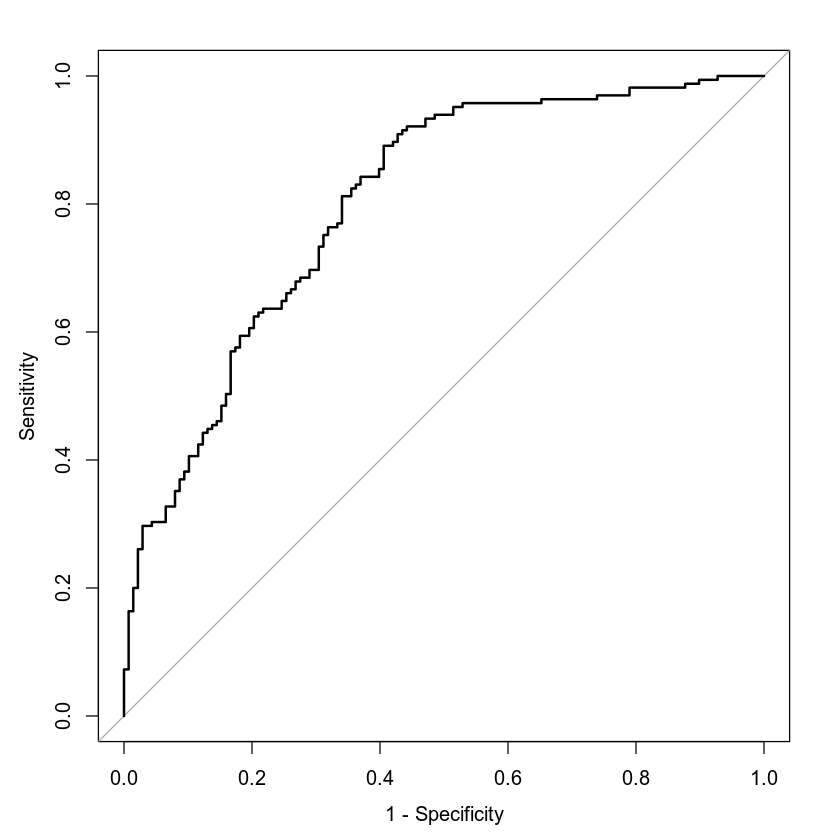

In [7]:
library(pROC)

labels <- heart_data$target
predictions <- logit$fitted.values

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
# True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)
plot(roc, legacy.axes = TRUE)

In [8]:
newdata1 <- data.frame(age=50, trestbps=122, exang='1', thalach=140)
pred1 <- predict(logit, newdata1, type='response')
round(pred1, 4)

newdata2 <- data.frame(age=50, trestbps=130, exang='0', thalach=165)
pred2 <- predict(logit, newdata2, type='response')
round(pred2, 4)

1 
0.2716

1 
0.7853

## Model #2 - Second Logistic Regression Model

You have been asked to create a logistic regression model for heart disease *(target)* using the variables maximum heart rate achieved *(thalach)*, age of the individual *(age)*, sex of the individual *(sex)*, exercise-induced angina *(exang)*, and type of chest pain *(cp)*. You also have to include the quadratic term for age and the interaction term between age and maximum heart rate achieved. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [9]:
logit2 <- glm(target ~ age + trestbps + cp + thalach + age:thalach + I(age^2), data = heart_data, family='binomial')

summary(logit2)


Call:
glm(formula = target ~ age + trestbps + cp + thalach + age:thalach + 
    I(age^2), family = "binomial", data = heart_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6961  -0.7537   0.2925   0.7123   2.3058  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.556e+01  1.054e+01  -1.476  0.13988    
age          1.744e-01  2.669e-01   0.653  0.51357    
trestbps    -1.958e-02  8.978e-03  -2.181  0.02916 *  
cp1          1.913e+00  4.437e-01   4.313 1.61e-05 ***
cp2          2.037e+00  3.473e-01   5.867 4.45e-09 ***
cp3          1.777e+00  5.477e-01   3.245  0.00117 ** 
thalach      1.363e-01  5.119e-02   2.663  0.00775 ** 
I(age^2)     8.424e-04  1.750e-03   0.481  0.63025    
age:thalach -1.867e-03  8.909e-04  -2.095  0.03616 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 417.64  on 302  degrees of freedom
Residual d

In [10]:
library(ResourceSelection)


print("Hosmer-Lemeshow Goodness of Fit Test")
hl = hoslem.test(logit2$y, fitted(logit2), g=50)
hl

[1] "Hosmer-Lemeshow Goodness of Fit Test"



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  logit2$y, fitted(logit2)
X-squared = 52, df = 48, p-value = 0.3209


In [11]:
conf_int <- confint.default(logit2, level=0.95)
round(conf_int,4)

,2.5 %,97.5 %
(Intercept),-36.2272,5.0999
age,-0.3488,0.6975
trestbps,-0.0372,-0.0020
cp1,1.0439,2.7830
cp2,1.3566,2.7178
cp3,0.7039,2.8507
thalach,0.0360,0.2367
I(age^2),-0.0026,0.0043
age:thalach,-0.0036,-0.0001


In [12]:
# Predict default or no_default for the data set using the model
default_model_data <- heart_data[c('age', 'trestbps','cp', 'thalach')]
pred <- predict(logit2, newdata=default_model_data, type='response')

# If the predicted probability of default is >=0.50 then predict credit default (default='1'), otherwise predict no credit 
# default (default='0') 
depvar_pred = as.factor(ifelse(pred >= 0.5, '1', '0'))

# This creates the confusion matrix
conf.matrix <- table(heart_data$target, depvar_pred)[c('0','1'),c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": default=")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": default=")

# Print nicely formatted confusion matrix
print("Confusion Matrix")
format(conf.matrix,justify="centre",digit=2)

[1] "Confusion Matrix"


,Prediction: default=0,Prediction: default=1
Actual: default=0,102,36
Actual: default=1,36,129


Setting levels: control = 0, case = 1
Setting direction: controls < cases


[1] "Area Under the Curve (AUC)"


[1] 0.8478

[1] "ROC Curve"


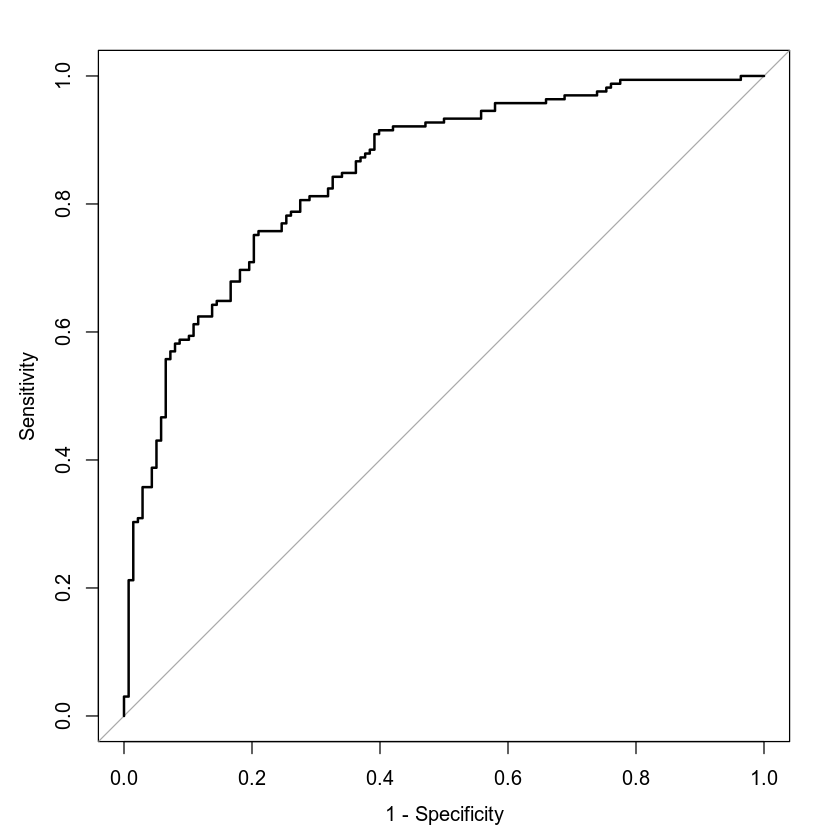

In [13]:
library(pROC)

labels <- heart_data$target
predictions <- logit2$fitted.values

roc <- roc(labels ~ predictions)

print("Area Under the Curve (AUC)")
round(auc(roc),4)

print("ROC Curve")
# True Positive Rate (Sensitivity) and False Positive Rate (1 - Specificity)
plot(roc, legacy.axes = TRUE)

In [14]:
newdata3 <- data.frame(age=50, trestbps=115, cp='0', thalach=133)
pred1 <- predict(logit2, newdata3, type='response')
round(pred1, 4)

newdata4 <- data.frame(age=50, trestbps=125, cp='1', thalach=155)
pred2 <- predict(logit2, newdata4, type='response')
round(pred2, 4)

1 
0.2188

1 
0.8007

## Random Forest Classification Model

You have been asked to create a random forest classification model for the presence of heart disease *(target)* using the variables age *(age)*, sex *(sex)*, chest pain type *(cp)*, resting blood pressure *(trestbps)*, cholesterol measurement *(chol)*, resting electrocardiographic measurement *(restecg)*, exercise-induced angina *(exang)*, slope of peak exercise *(slope)*, and number of major vessels *(ca)*. Before writing any code, review Section 5 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [15]:
heart_data <- read.csv(file='heart_disease.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

vars <- c('target','age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'exang', 'ca')

heart_data <- heart_data[vars]

print("head")
head(heart_data, 6)

[1] "head"


target,age,sex,cp,trestbps,chol,restecg,exang,ca
<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,62,1,2,130,231,1,0,3
1,58,0,0,130,197,1,0,0
1,60,0,3,150,240,1,0,0
0,63,1,0,140,187,0,1,2
0,62,1,0,120,267,1,1,2
1,63,0,2,135,252,0,0,0


In [16]:
set.seed(6522048)

# Partition the data set into training and testing data
samp.size = floor(0.85*nrow(heart_data))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(heart_data)), size = samp.size)
train.data = heart_data[train_ind,]
nrow(train.data)

# Testing set 
print("Number of rows for the testing set")
test.data = heart_data[-train_ind,]
nrow(test.data)

[1] "Number of rows for the training set"


[1] 257

[1] "Number of rows for the testing set"


[1] 46

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


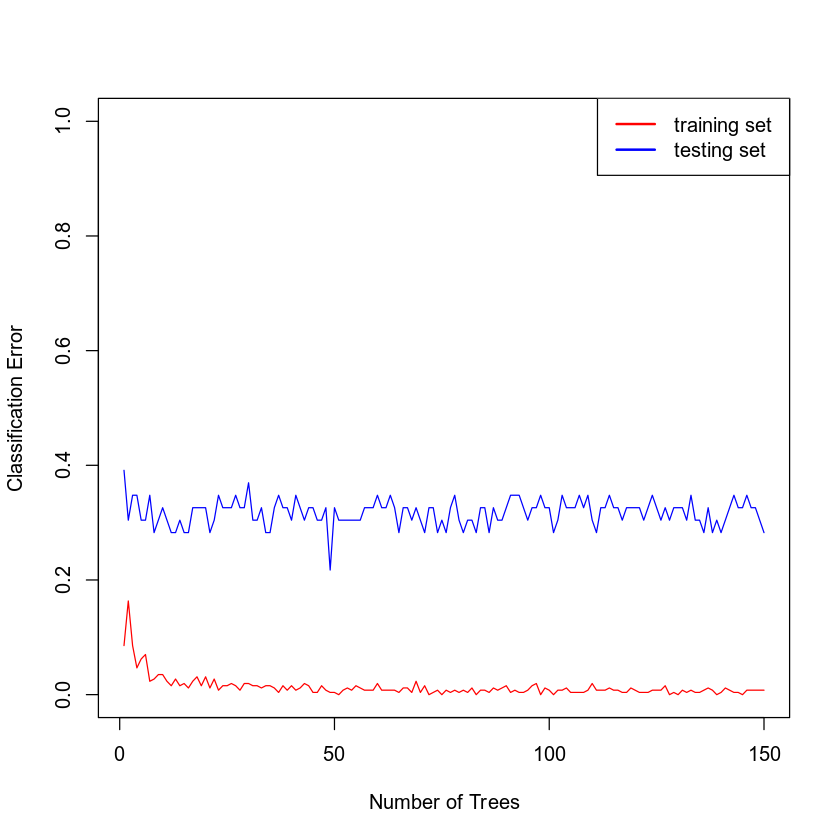

In [17]:
set.seed(6522048)
library(randomForest)

# checking
#=====================================================================
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=150, by=1)) {
    #print(i)
    
    trees <- c(trees, i)
    
    forest_class <- randomForest(target ~ age + sex + cp + trestbps + chol + restecg + exang + ca, data=train.data, ntree = i)
    
    train.data.predict <- predict(forest_class, train.data, type = "class")
    conf.matrix1 <- table(train.data$target, train.data.predict)
    train_error = 1-(sum(diag(conf.matrix1)))/sum(conf.matrix1)
    train <- c(train, train_error)
    
    test.data.predict <- predict(forest_class, test.data, type = "class")
    conf.matrix2 <- table(test.data$target, test.data.predict)
    test_error = 1-(sum(diag(conf.matrix2)))/sum(conf.matrix2)
    test <- c(test, test_error)
}
 
#matplot (trees, cbind (train, test), ylim=c(0,0.5) , type = c("l", "l"), lwd=2, col=c("red","blue"), ylab="Error", xlab="number of trees")
#legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

plot(trees, train,type = "l",ylim=c(0,1.0),col = "red", xlab = "Number of Trees", ylab = "Classification Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

In [18]:
set.seed(6522048)
library(randomForest)
forest_class2 <- randomForest(target ~ age + sex + cp + trestbps + chol + restecg + exang + ca, data=train.data, ntree = 60)

# Confusion matrix
print("======================================================================================================================")
print('Confusion Matrix: TRAINING set based on random forest model built using 60 trees')
train.data.predict <- predict(forest_class2, train.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(train.data$target, train.data.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)


print("======================================================================================================================")
print('Confusion Matrix: TESTING set based on random forest model built using 60 trees')
test.data.predict <- predict(forest_class2, test.data, type = "class")

# Construct the confusion matrix
conf.matrix <- table(test.data$target, test.data.predict)[,c('0','1')]
rownames(conf.matrix) <- paste("Actual", rownames(conf.matrix), sep = ": ")
colnames(conf.matrix) <- paste("Prediction", colnames(conf.matrix), sep = ": ")

# Print nicely formatted confusion matrix
format(conf.matrix,justify="centre",digit=2)

[1] "======================================================================================================================"
[1] "Confusion Matrix: TRAINING set based on random forest model built using 60 trees"


,Prediction: 0,Prediction: 1
Actual: 0,117,3
Actual: 1,2,135


[1] "======================================================================================================================"
[1] "Confusion Matrix: TESTING set based on random forest model built using 60 trees"


,Prediction: 0,Prediction: 1
Actual: 0,11,7
Actual: 1,9,19


## Random Forest Regression Model

You have been asked to create a random forest regression model for maximum heart rate achieved using the variables age *(age)*, sex *(sex)*, chest pain type *(cp)*, resting blood pressure *(trestbps)*, cholesterol measurement *(chol)*, resting electrocardiographic measurement *(restecg)*, exercise-induced angina *(exang)*, slope of peak exercise *(slope)*, and number of major vessels *(ca)*. Before writing any code, review Section 6 of the Summary Report template to see the questions you will be answering about your model.

Run your scripts to get the outputs of your analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [19]:
heart_data <- read.csv(file='heart_disease.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
heart_data <- within(heart_data, {
   target <- factor(target)
   sex <- factor(sex)
   cp <- factor(cp)
   fbs <- factor(fbs)
   restecg <- factor(restecg)
   exang <- factor(exang)
   slope <- factor(slope)
   ca <- factor(ca)
   thal <- factor(thal)
})

vars <- c('thalach','age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'exang', 'ca')

heart_data <- heart_data[vars]

print("head")
head(heart_data, 6)

[1] "head"


thalach,age,sex,cp,trestbps,chol,restecg,exang,ca
<int>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
146,62,1,2,130,231,1,0,3
131,58,0,0,130,197,1,0,0
171,60,0,3,150,240,1,0,0
144,63,1,0,140,187,0,1,2
99,62,1,0,120,267,1,1,2
172,63,0,2,135,252,0,0,0


In [20]:
set.seed(6522048)

# Partition the data set into training and testing data
samp.size = floor(0.80*nrow(heart_data))

# Training set
print("Number of rows for the training set")
train_ind = sample(seq_len(nrow(heart_data)), size = samp.size)
train.data = heart_data[train_ind,]
nrow(train.data)

# Testing set 
print("Number of rows for the testing set")
test.data = heart_data[-train_ind,]
nrow(test.data)

[1] "Number of rows for the training set"


[1] 242

[1] "Number of rows for the testing set"


[1] 61

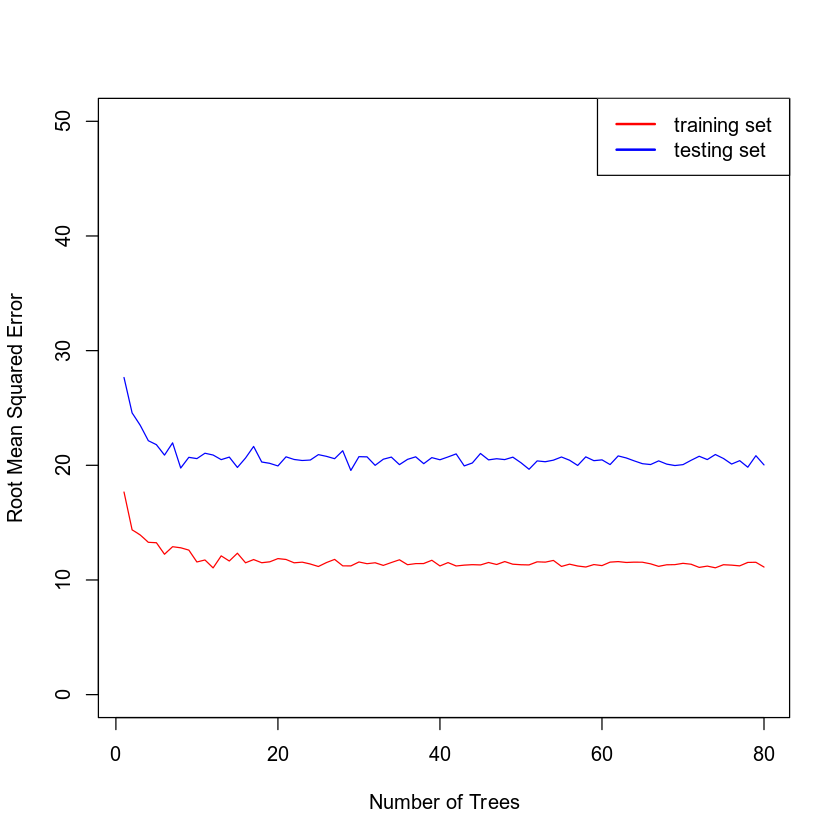

In [21]:
set.seed(6522048)
library(randomForest)

# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}


# checking
#=====================================================================
train = c()
test = c()
trees = c()

for(i in seq(from=1, to=80, by=1)) {
    trees <- c(trees, i)
    forest_reg <- randomForest(thalach ~ age + sex + cp + trestbps + chol + restecg + exang + ca, data=train.data, ntree = i)
    
    pred <- predict(forest_reg, newdata=train.data, type='response')
    rmse_train <-  RMSE(pred, train.data$thalach)
    train <- c(train, rmse_train)
    
    pred <- predict(forest_reg, newdata=test.data, type='response')
     rmse_test <-  RMSE(pred, test.data$thalach)
    test <- c(test, rmse_test)
}
 
plot(trees, train,type = "l",ylim=c(0,50),col = "red", xlab = "Number of Trees", ylab = "Root Mean Squared Error")
lines(test, type = "l", col = "blue")
legend('topright',legend = c('training set','testing set'), col = c("red","blue"), lwd = 2 )

In [22]:
set.seed(6522048)
library(randomForest)
forest_reg2 <- randomForest(thalach ~ age + sex + cp + trestbps + chol + restecg + exang + ca, data=train.data, ntree = 30)


# Root mean squared error
RMSE = function(pred, obs) {
    return(sqrt( sum( (pred - obs)^2 )/length(pred) ) )
}

print("======================================================================================================================")
print('Root Mean Squared Error: TRAINING set based on random forest model built using 30 trees')
pred <- predict(forest_reg2, newdata=train.data, type='response')
RMSE(pred, train.data$thalach)


print("======================================================================================================================")
print('Root Mean Squared Error: TESTING set based on random forest model built using 30 trees')
pred <- predict(forest_reg2, newdata=test.data, type='response')
RMSE(pred, test.data$thalach)

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TRAINING set based on random forest model built using 30 trees"


[1] 11.5619

[1] "======================================================================================================================"
[1] "Root Mean Squared Error: TESTING set based on random forest model built using 30 trees"


[1] 20.78719

## End of Project Two Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Summary Report template for Project Two, and to include your completed Jupyter Notebook scripts as part of your submission.